In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_excel(r"C:\Users\HP\Downloads\Documents\Hydrological Machine Learning Dataset.xlsx")

In [3]:
df.head()

,POINTS,Area(ha),Lov(m),H1(m),H2(m),Lch(m),H3(m),N,Sov,Sch,Tov(mins),Tch(mins),Tc(mins),Runoff Coefficient(C),I 25yr(mm/hr),I 50yr(mm/hr),I 100yr(mm/hr),Q 25yr,Q 50yr,Q 100yr
0,ISU-NJABA/EZIAMA ROAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PT_A_1,12.906,66.065,197.667,195.618,1762.0,150.234,0.3,0.03101,0.02576,13.13971,25.19207,38.33,0.34,168.0,192.0,220.0,2.05,2.34,2.68
2,PT_A_2,13.655,40.667,198.252,197.564,2029.0,150.977,0.3,0.01692,0.02296,12.07905,29.35374,41.43,0.34,158.0,181.0,210.0,2.04,2.33,2.71
3,PT_A_3,4.633,51.594,198.138,197.548,1509.0,121.120,0.3,0.01144,0.05065,14.80037,17.23330,32.03,0.34,183.0,210.0,235.0,0.80,0.92,1.03
4,PT_A_4_L,8.959,147.600,194.027,190.103,488.3,172.002,0.3,0.02659,0.03707,19.83127,8.15178,27.98,0.34,200.0,222.0,249.0,1.69,1.88,2.11


In [7]:
features = ['Area(ha)', 'Lov(m)', 'Tc(mins)', 'Runoff Coefficient(C)', 'Sov', 'I 25yr(mm/hr)']
X = df[features]

In [17]:
iso_forest = IsolationForest(
    n_estimators=200,        
    contamination=0.15,      
    max_samples='auto',     
    random_state=42
)


In [18]:
iso_forest.fit(X)

IsolationForest(contamination=0.15, n_estimators=200, random_state=42)

In [19]:
df['Anomaly'] = iso_forest.predict(X)

In [20]:
df['Anomaly_Label'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

In [21]:
print("\nAnomaly Counts:")
print(df['Anomaly_Label'].value_counts())



Anomaly Counts:
Anomaly_Label
Normal    24
Name: count, dtype: int64


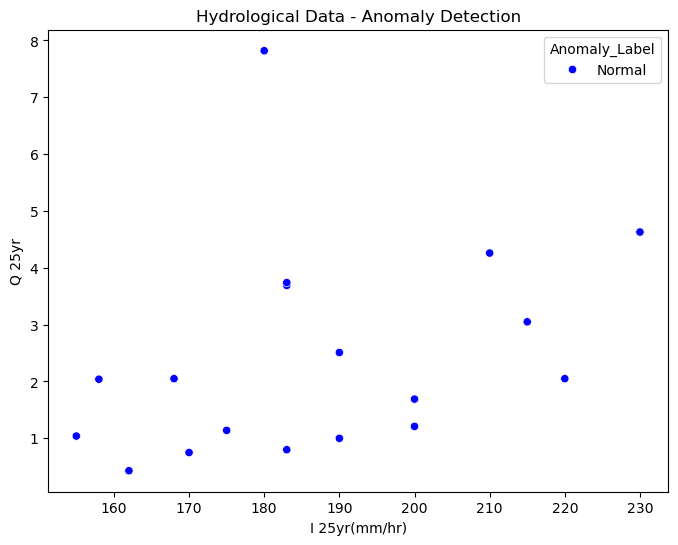

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='I 25yr(mm/hr)', 
    y='Q 25yr',
    hue='Anomaly_Label',
    palette={'Normal': 'blue', 'Anomaly': 'red'}
)
plt.title('Hydrological Data - Anomaly Detection')
plt.show()

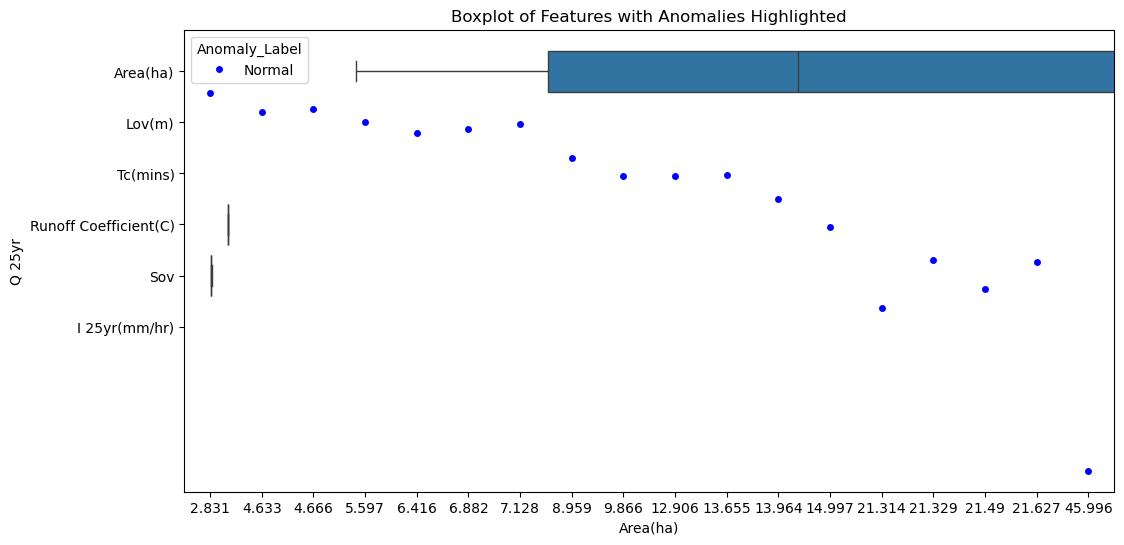

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[features], orient="h")
sns.stripplot(data=df, x="Area(ha)", y="Q 25yr", hue="Anomaly_Label",
              jitter=True, dodge=True, palette={"Normal": "blue", "Anomaly": "red"})
plt.title("Boxplot of Features with Anomalies Highlighted")
plt.show()

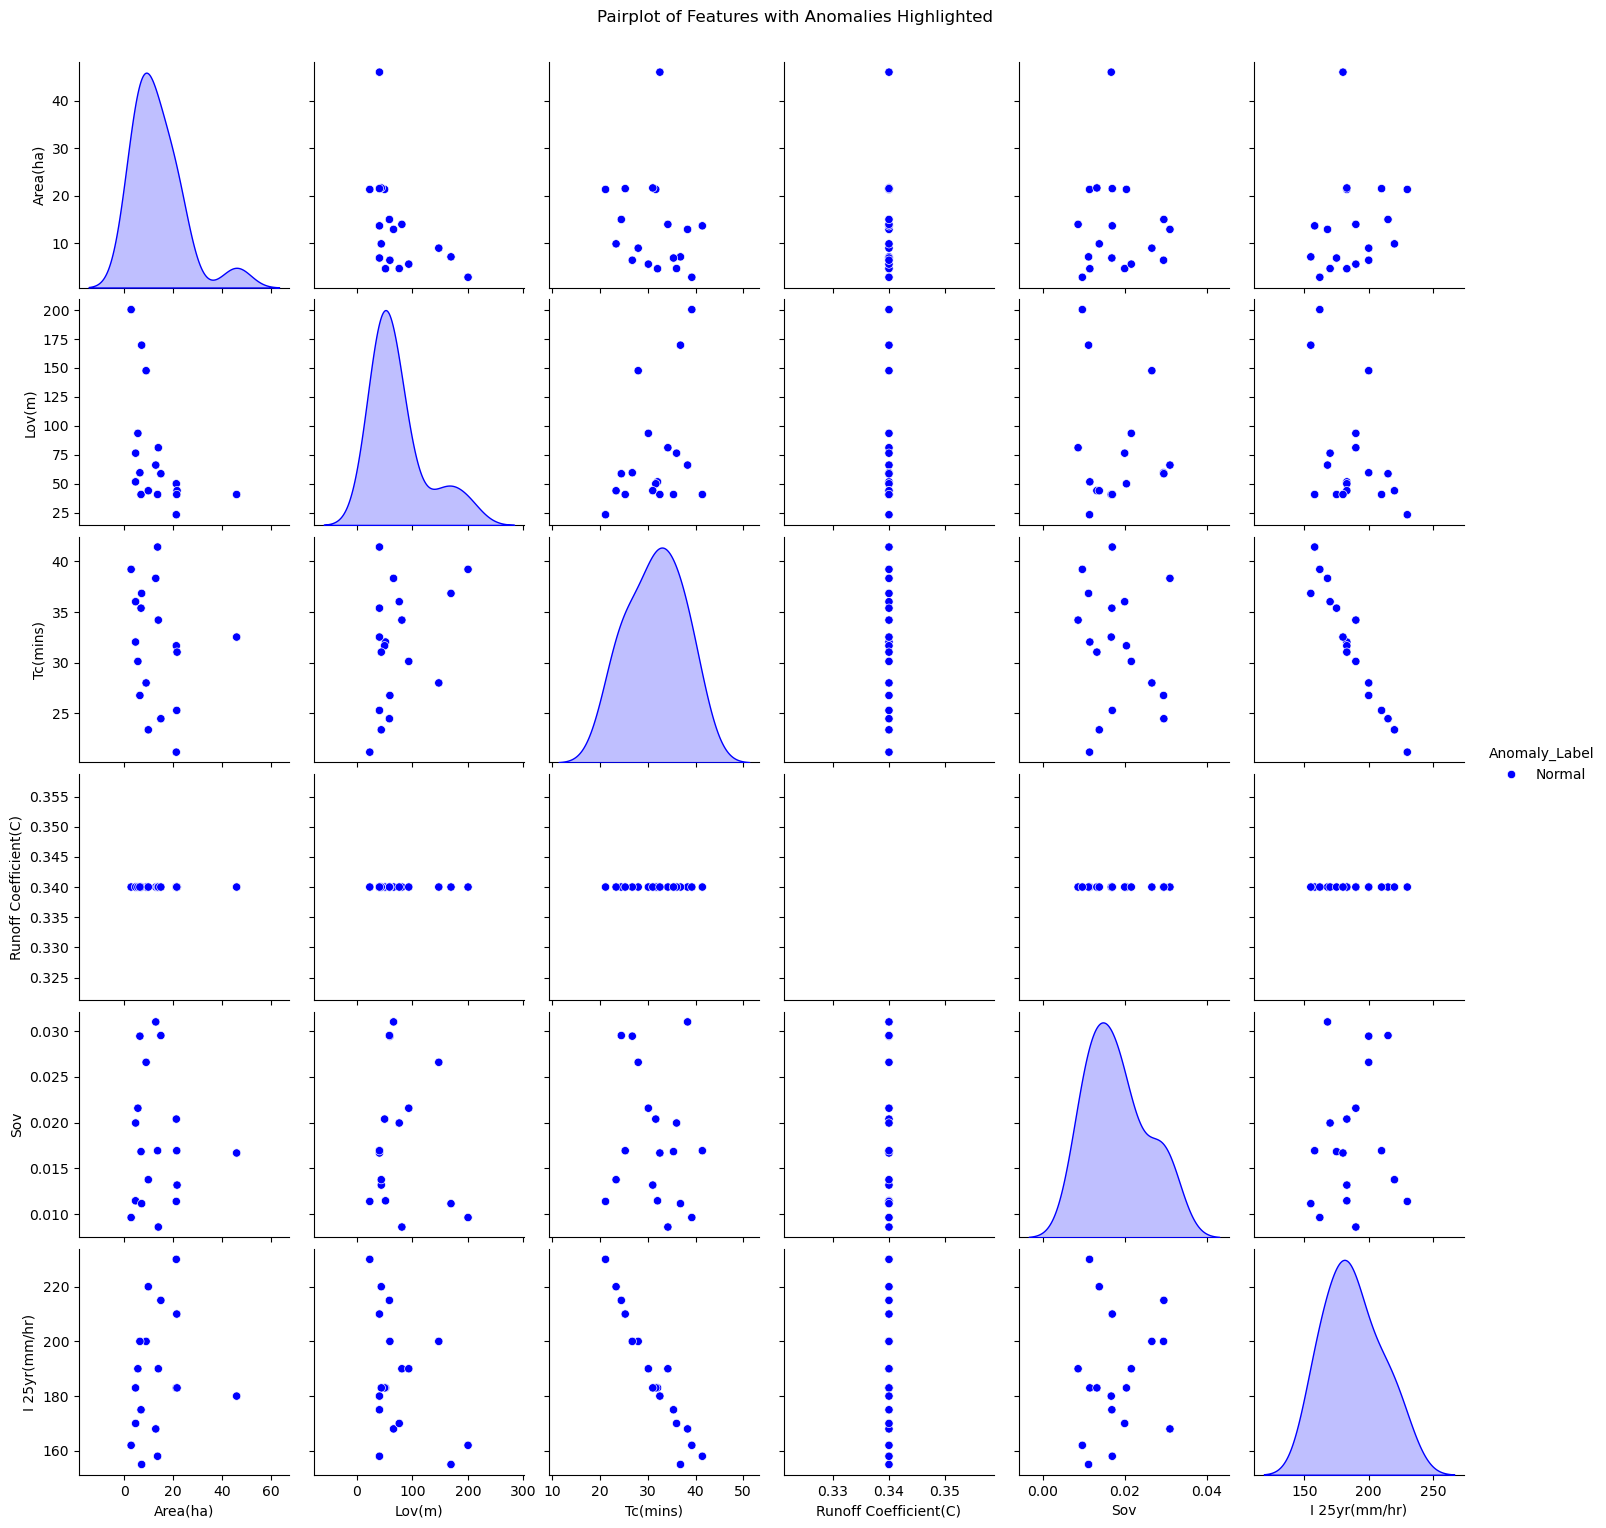

In [24]:
sns.pairplot(
    df[features + ['Anomaly_Label']], 
    hue="Anomaly_Label", 
    palette={"Normal": "blue", "Anomaly": "red"}, 
    diag_kind="kde"
)
plt.suptitle("Pairplot of Features with Anomalies Highlighted", y=1.02)
plt.show()